# Распределение степеней узлов

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 2: Модели"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.in_degree.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.out_degree.html
* Дополнительные источники:
    * https://www.scaler.com/topics/matplotlib/logarithmic-scale-matplotlib/
* Датасеты с сетями:
    * http://networkrepository.com

## Вопросы для совместного обсуждения

1\. Обсудите различные подходы к вычислению степеней узлов графа.

In [ ]:
import networkx as nx

In [ ]:
G = nx.empty_graph() # G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3)])

In [ ]:
G.nodes

NodeView((0, 1, 2, 3))

In [ ]:
G.degree

DegreeView({0: 1, 1: 2, 2: 2, 3: 1})

In [ ]:
G.degree()

DegreeView({0: 1, 1: 2, 2: 2, 3: 1})

In [ ]:
A = nx.adjacency_matrix(G).toarray()
A

array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
A.sum(axis=1), A.sum(axis=0)

(array([1, 2, 2, 1]), array([1, 2, 2, 1]))

In [ ]:
G = nx.empty_graph(create_using=nx.DiGraph) # G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3)])

In [ ]:
G.in_degree()

InDegreeView({0: 0, 1: 1, 2: 1, 3: 1})

In [ ]:
G.out_degree()

OutDegreeView({0: 1, 1: 1, 2: 1, 3: 0})

In [ ]:
G.degree()

DiDegreeView({0: 1, 1: 2, 2: 2, 3: 1})

In [ ]:
A = nx.adjacency_matrix(G).toarray()
A

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [ ]:
A.sum(axis=1), A.sum(axis=0)

(array([1, 1, 1, 0]), array([0, 1, 1, 1]))

In [ ]:
(A * 5)

array([[0, 5, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 5],
       [0, 0, 0, 0]])

2\. Обсудите использование различных шкал (линейной, логарифмической) для визуализациии графиков.

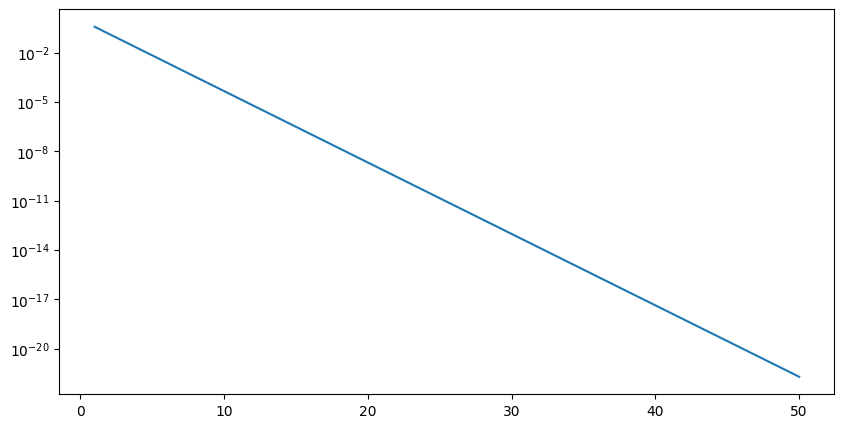

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 50, 100)
y = np.exp(-x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, y)
# ax.loglog(x, y)
ax.set_yscale("log")

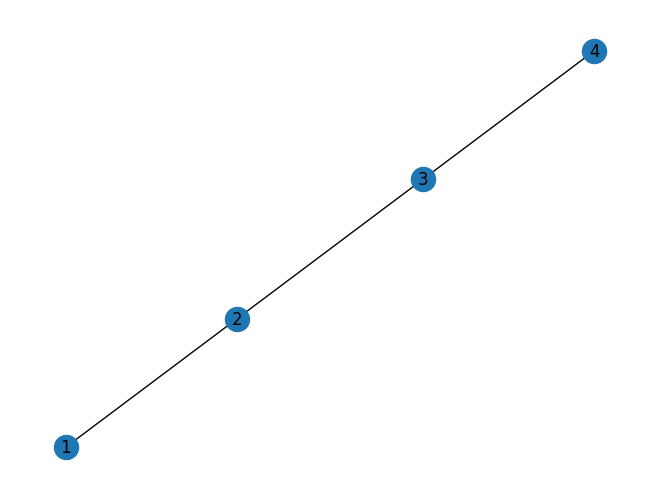

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4)])

# Визуализация с линейной шкалой
nx.draw(G, with_labels=True)
plt.show()

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте неориентированный граф на основе набора данных `fb-pages-food` с сайта https://networkrepository.com/. Добавьте узлам атрибут `name`, который содержит имя человека. Удалите из графа все петли. Получите матрицу смежности графа и посчитайте степень каждого узла на основе этой матрицы. Выведите имя человека, чей узел имеет максимальную степень, и само значение степени.

- [ ] Проверено на семинаре

In [46]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
edges_file = '/content/drive/MyDrive/fb-pages-food.edges'
nodes_file = '/content/drive/MyDrive/fb-pages-food.nodes'

edges_data = np.loadtxt(edges_file, dtype=str, delimiter=',')
nodes_df = pd.read_csv(nodes_file, dtype=str)

In [ ]:
nodes_df.head()

,id,name,new_id
0,402449106435352,Josh Marks,386
1,368969274888,Blue Ribbon Restaurants,473
2,765596333518863,Pat Neely,1
3,136870209668885,La Griglia,542
4,840078802741859,Jose Garces,189


In [ ]:
nodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      620 non-null    object
 1   name    620 non-null    object
 2   new_id  620 non-null    object
dtypes: object(3)
memory usage: 14.7+ KB


In [ ]:
edges_data

array([['0', '276'],
       ['0', '58'],
       ['0', '132'],
       ...,
       ['601', '616'],
       ['603', '616'],
       ['311', '613']], dtype='<U3')

In [ ]:
nodes_df[nodes_df['new_id'] == '601']

,id,name,new_id
117,258113974257610,Chef Marc Murphy,601


In [ ]:
G = nx.Graph()
for i in range(len(nodes_df['name'])):
    G.add_node(nodes_df['new_id'][i], name=nodes_df['name'][i])

In [ ]:
for i in edges_data:
    G.add_edge(i[0],i[1])

In [ ]:
has_name_attr = all("name" in G.nodes[node] for node in G.nodes)
has_name_attr

True

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
adj_matrix = nx.adjacency_matrix(G).toarray()
adj_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
adj_matrix.shape

(620, 620)

In [ ]:
n_matrix = np.sum(adj_matrix, axis=1)

In [ ]:
max(n_matrix)

132

In [ ]:
nodes_df['new_id'][np.where(n_matrix == 132)[0].item()]

'265'

In [ ]:
max_degree_node = nodes_df['new_id'][np.where(n_matrix == 132)[0].item()]
max_degree = max(n_matrix)
max_degree_name = G.nodes[max_degree_node]["name"]

In [ ]:
print("Имя человека с максимальной степенью:", max_degree_name)
print("Максимальная степень:", max_degree)

Имя человека с максимальной степенью: Logan Junior Chef
Максимальная степень: 132


<p class="task" id="2"></p>

2\. Используя граф из предыдущего задания, посчитайте степени каждого узла, используя возможности графа `nx.Graph`. Посчитайте и выведите на экран среднюю степень узлов графа, округленную до ближайшего целого.

- [ ] Проверено на семинаре

In [51]:
degrees = G.degree()

In [52]:
for node, degree in degrees:
    print(f"Узел {node}: степень {degree}")

Узел 386: степень 7
Узел 473: степень 7
Узел 1: степень 2
Узел 542: степень 1
Узел 189: степень 5
Узел 454: степень 4
Узел 158: степень 9
Узел 248: степень 25
Узел 537: степень 2
Узел 293: степень 4
Узел 171: степень 5
Узел 485: степень 10
Узел 258: степень 7
Узел 534: степень 1
Узел 500: степень 2
Узел 194: степень 3
Узел 34: степень 6
Узел 465: степень 16
Узел 562: степень 1
Узел 511: степень 1
Узел 201: степень 1
Узел 188: степень 1
Узел 440: степень 5
Узел 484: степень 3
Узел 240: степень 10
Узел 533: степень 2
Узел 235: степень 15
Узел 82: степень 6
Узел 212: степень 6
Узел 35: степень 22
Узел 19: степень 1
Узел 154: степень 12
Узел 334: степень 13
Узел 148: степень 5
Узел 599: степень 8
Узел 382: степень 4
Узел 230: степень 13
Узел 7: степень 7
Узел 576: степень 17
Узел 164: степень 22
Узел 594: степень 2
Узел 396: степень 1
Узел 284: степень 2
Узел 63: степень 10
Узел 160: степень 2
Узел 573: степень 1
Узел 61: степень 1
Узел 25: степень 1
Узел 409: степень 1
Узел 329: степень 1

In [53]:
average_degree = sum(dict(degrees).values()) / len(G)
print(f"Средняя степень узлов графа: {round(average_degree)}")

Средняя степень узлов графа: 7


<p class="task" id="3"></p>

3\. Создайте ориентированный граф на основе набора данных `fb-pages-food` с сайта https://networkrepository.com/. Удалите из графа все петли. Получите матрицу смежности графа и посчитайте входящую и исходящую степень каждого узла на основе этой матрицы. Найдите и выведите на экран максимальное значение исходящих степеней и среднее значение входящих степеней.

- [ ] Проверено на семинаре

In [ ]:
G = nx.DiGraph()
for i in range(len(nodes_df['name'])):
    G.add_node(nodes_df['new_id'][i], name=nodes_df['name'][i])

In [ ]:
for i in edges_data:
    G.add_edge(i[0],i[1])

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
adj_matrix = nx.adjacency_matrix(G).toarray()
adj_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
in_degrees = adj_matrix.sum(axis=0)
out_degrees = adj_matrix.sum(axis=1)

In [ ]:
max_out_degree = max(out_degrees)
avg_in_degree = in_degrees.mean()
print("Максимальное значение исходящих степеней:", max_out_degree)
print("Среднее значение входящих степеней:", avg_in_degree)

Максимальное значение исходящих степеней: 67
Среднее значение входящих степеней: 3.3725806451612903


<p class="task" id="4"></p>

4\. Постройте графики выборочной функции распределения входящих и исходящих степеней узлов для загруженного ориентированного графа. Для нахождения степеней узлов воспользуйтесь возможностями графа `nx.DiGraph`. Добавьте графикам названия, а осям - подписи. Расположите графики рядом по горизонтали.

- [ ] Проверено на семинаре

In [54]:
in_degrees = [G.in_degree(node) for node in G.nodes()]
out_degrees = [G.out_degree(node) for node in G.nodes()]

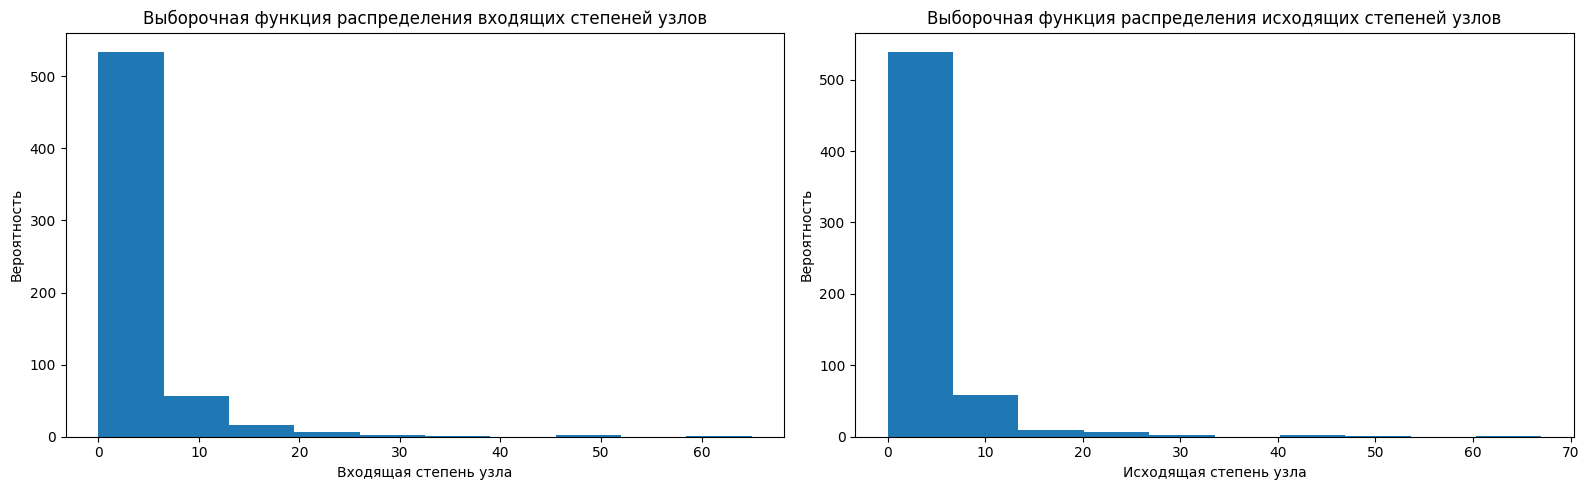

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.hist(in_degrees, bins=10)
ax1.set_title("Выборочная функция распределения входящих степеней узлов")
ax1.set_xlabel("Входящая степень узла")
ax1.set_ylabel("Вероятность")

ax2.hist(out_degrees, bins=10)
ax2.set_title("Выборочная функция распределения исходящих степеней узлов")
ax2.set_xlabel("Исходящая степень узла")
ax2.set_ylabel("Вероятность")

plt.tight_layout()
plt.show()

<p class="task" id="5"></p>

5\. Визуализируйте закон распределения степеней узлов в обычной и логарифимических (по 1й и по 2м осям) системах координат для неориентированного графа. Расположите графики в виде сетки 2х2. Добавьте графикам названия, а осям - подписи.

- [ ] Проверено на семинаре

In [58]:
G = nx.Graph()
for i in range(len(nodes_df['name'])):
    G.add_node(nodes_df['new_id'][i], name=nodes_df['name'][i])

In [59]:
for i in edges_data:
    G.add_edge(i[0],i[1])

In [60]:
has_name_attr = all("name" in G.nodes[node] for node in G.nodes)
has_name_attr

True

In [61]:
G.remove_edges_from(nx.selfloop_edges(G))

In [62]:
degrees = [G.degree(node) for node in G.nodes()]

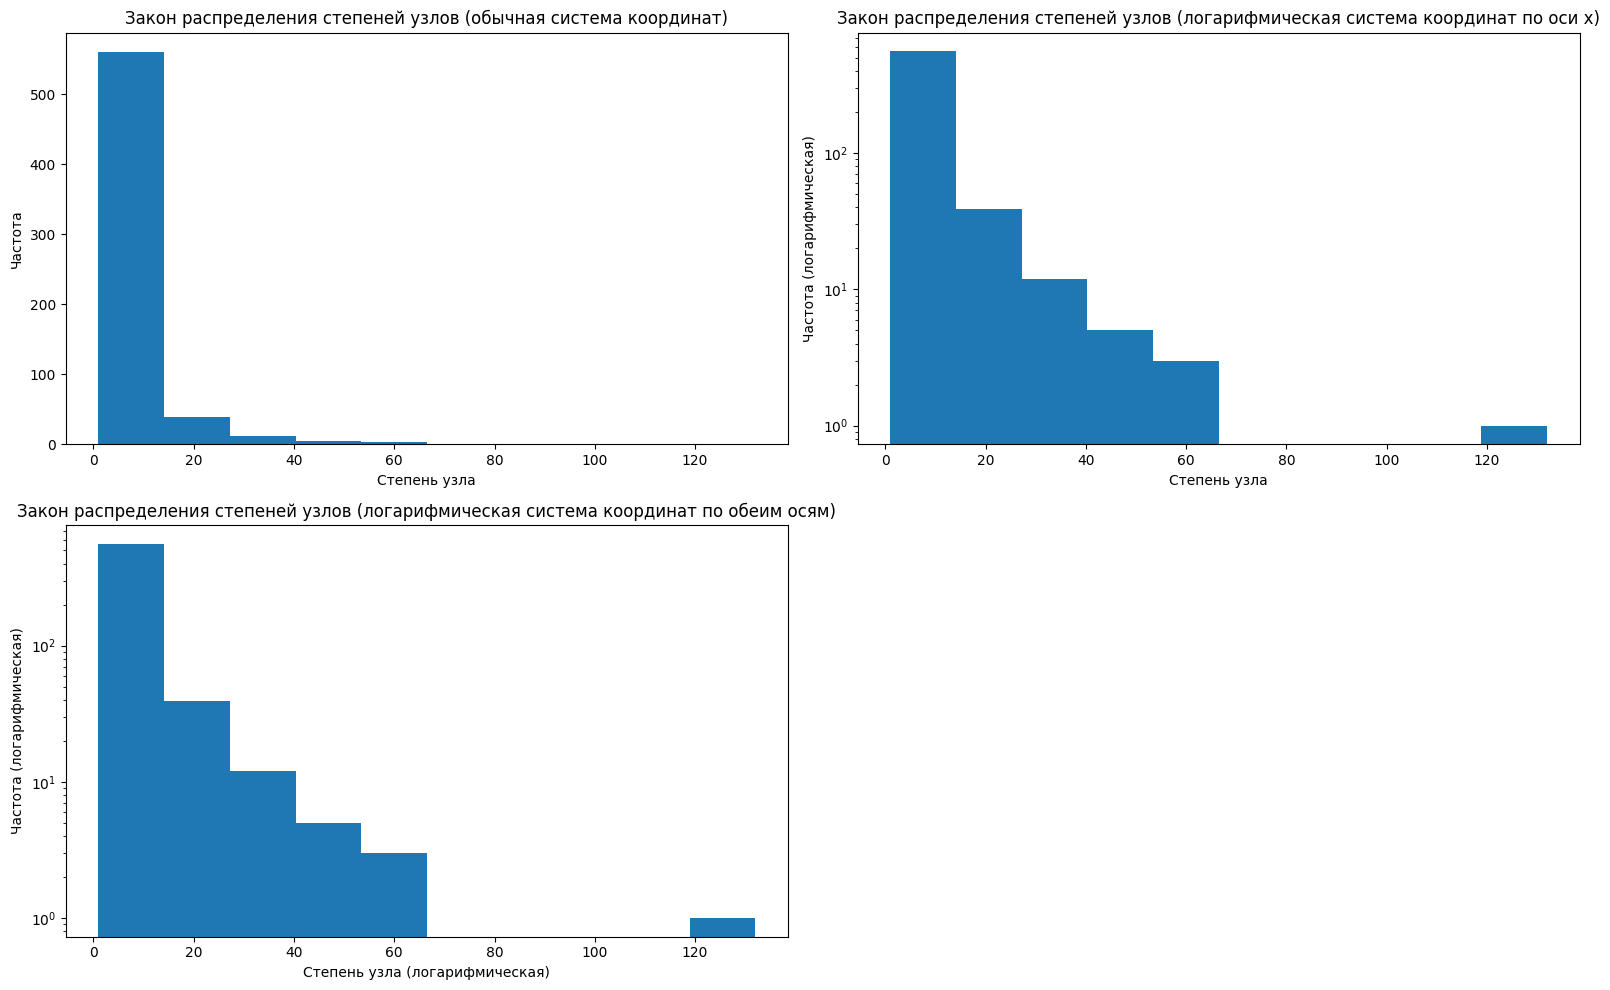

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

axs[0, 0].hist(degrees, bins=10)
axs[0, 0].set_title("Закон распределения степеней узлов (обычная система координат)")
axs[0, 0].set_xlabel("Степень узла")
axs[0, 0].set_ylabel("Частота")

axs[0, 1].hist(degrees, bins=10, log=True)
axs[0, 1].set_title("Закон распределения степеней узлов (логарифмическая система координат по оси x)")
axs[0, 1].set_xlabel("Степень узла")
axs[0, 1].set_ylabel("Частота (логарифмическая)")

axs[1, 0].hist(degrees, bins=10, log=True)
axs[1, 0].set_title("Закон распределения степеней узлов (логарифмическая система координат по обеим осям)")
axs[1, 0].set_xlabel("Степень узла (логарифмическая)")
axs[1, 0].set_ylabel("Частота (логарифмическая)")

fig.delaxes(axs[1, 1])

plt.tight_layout()

plt.show()